In [2]:
import pandas as pd
import requests
import os

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"
data = requests.get(url).json()

df = pd.json_normalize(data)
df.columns = df.columns.str.strip()
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = df.fillna(0)

if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

nombre_archivo = "telecomx_relevante.csv"
df.to_csv(nombre_archivo, index=False)
print(f"Archivo guardado en: {os.path.abspath(nombre_archivo)}")




Archivo guardado en: /content/telecomx_relevante.csv


/tmp/ipython-input-1774085069.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [4]:

df = pd.read_csv("telecomx_relevante.csv")


print("Columnas actuales:")
print(df.columns.tolist())


columnas_a_eliminar = ['customerID']


df = df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns])


df.to_csv("telecomx_relevante_sin_id.csv", index=False)

print("Columnas eliminadas y archivo guardado como 'telecomx_relevante_sin_id.csv'")
print("Columnas restantes:")
print(df.columns.tolist())

Columnas actuales:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
Columnas eliminadas y archivo guardado como 'telecomx_relevante_sin_id.csv'
Columnas restantes:
['Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMe

In [5]:

columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print("Columnas categóricas a codificar:", columnas_categoricas)


df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)


df_encoded.to_csv("telecomx_codificado.csv", index=False)

print("Archivo con variables categóricas codificadas guardado como 'telecomx_codificado.csv'.")
print("Columnas después de codificar:", df_encoded.columns.tolist())


Columnas categóricas a codificar: ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']
Archivo con variables categóricas codificadas guardado como 'telecomx_codificado.csv'.
Columnas después de codificar: ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No internet service', 

In [10]:
conteo = df['Churn'].value_counts()
print("Conteo de clases:\n", conteo)

proporcion = df['Churn'].value_counts(normalize=True)
print("\nProporción de clases:\n", proporcion)

print("\nProporción en porcentaje:")
print(proporcion * 100)


Conteo de clases:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Proporción de clases:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Proporción en porcentaje:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [11]:


print(df_encoded.columns.tolist())


y = df_encoded['Churn_Yes']
X = df_encoded.drop(columns=['Churn_Yes'])


columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns


X_scaled = X.copy()
X_scaled[columnas_numericas] = scaler.fit_transform(X[columnas_numericas])

print(X_scaled.head())



['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total', 'Churn_Yes', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No internet service', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No internet service', 'internet.DeviceProtection_Yes', 'internet.TechSupport_No internet service', 'internet.TechSupport_Yes', 'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes', 'internet.StreamingMovies_No internet service', 'internet.StreamingMovies_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.Pa

Correlación con la variable objetivo:
Churn_Yes                                        1.000000
internet.InternetService_Fiber optic             0.300949
account.PaymentMethod_Electronic check           0.294626
account.Charges.Monthly                          0.189866
account.PaperlessBilling_Yes                     0.186666
customer.SeniorCitizen                           0.146733
internet.StreamingTV_Yes                         0.062430
internet.StreamingMovies_Yes                     0.060586
phone.MultipleLines_Yes                          0.039343
phone.PhoneService_Yes                           0.012571
customer.gender_Male                            -0.009555
phone.MultipleLines_No phone service            -0.012571
internet.DeviceProtection_Yes                   -0.063452
internet.OnlineBackup_Yes                       -0.080163
account.PaymentMethod_Mailed check              -0.090061
account.PaymentMethod_Credit card (automatic)   -0.131085
customer.Partner_Yes              

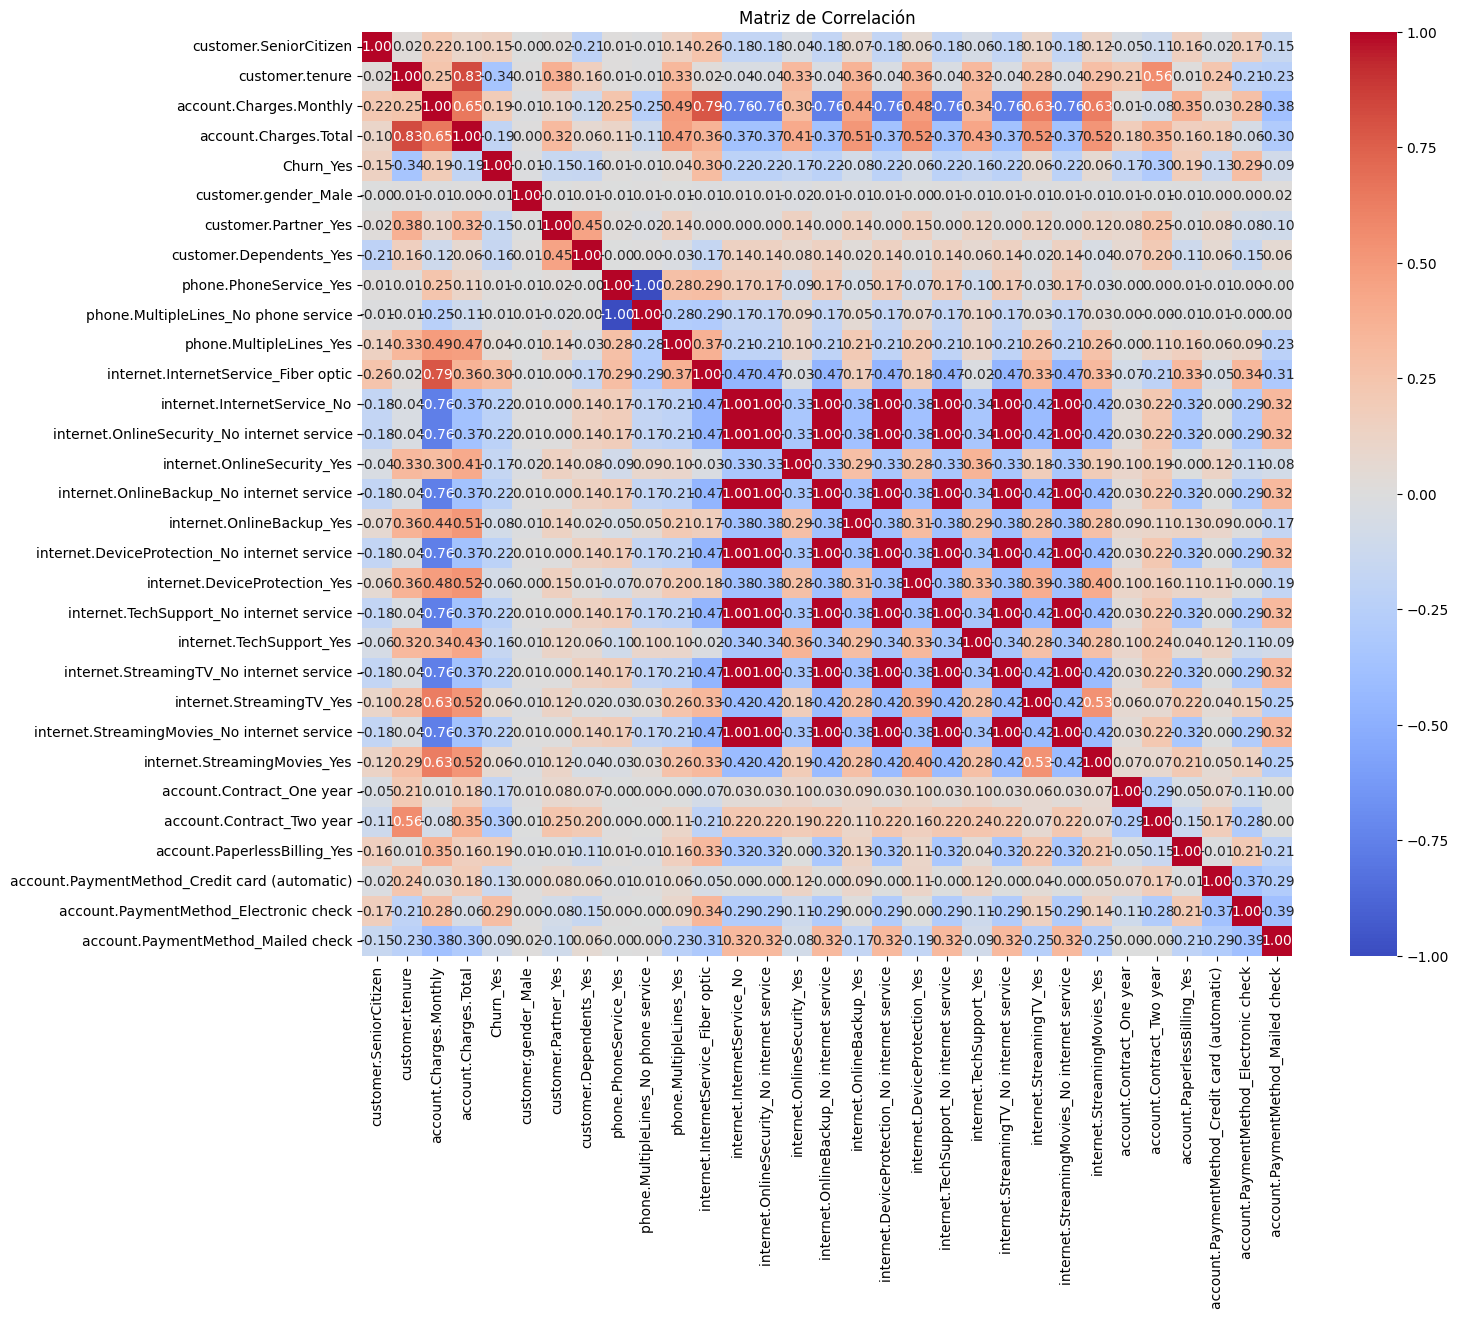

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df_encoded.corr()


print("Correlación con la variable objetivo:")
print(corr_matrix['Churn_Yes'].sort_values(ascending=False))


plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlación")
plt.show()


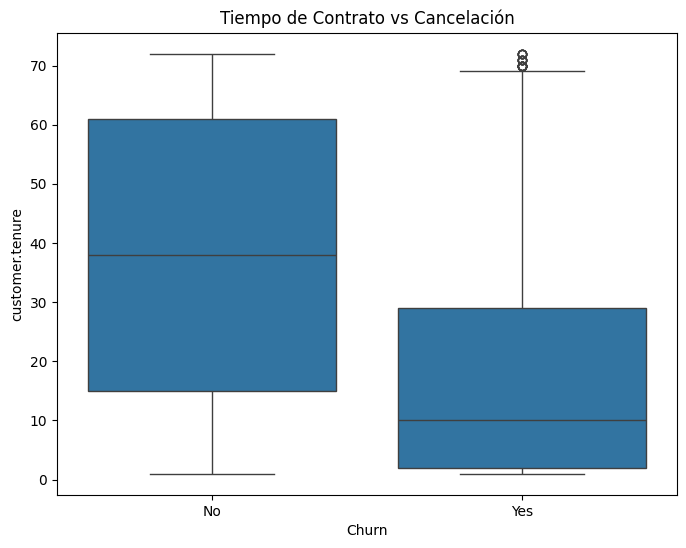

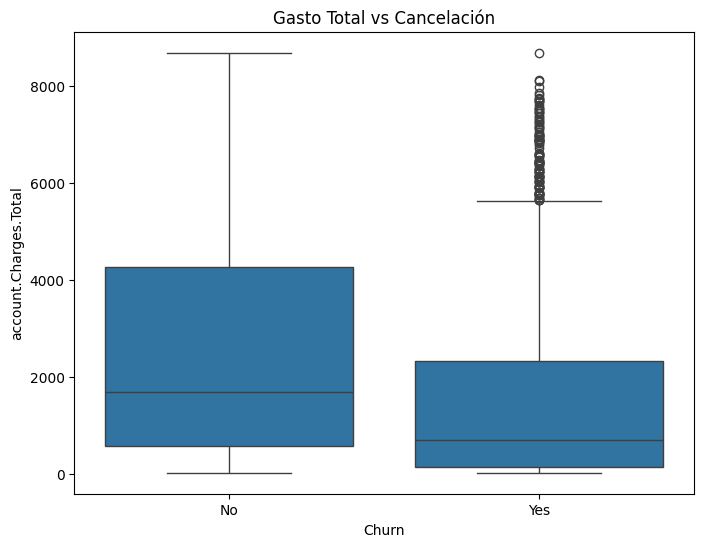

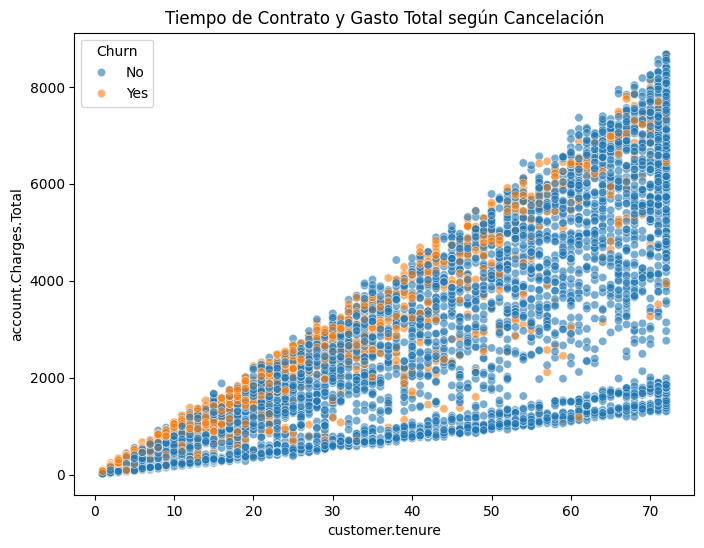

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


df_plot = df[['customer.tenure', 'account.Charges.Total', 'Churn']].dropna()

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='customer.tenure', data=df_plot)
plt.title('Tiempo de Contrato vs Cancelación')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df_plot)
plt.title('Gasto Total vs Cancelación')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='customer.tenure', y='account.Charges.Total', hue='Churn', data=df_plot, alpha=0.6)
plt.title('Tiempo de Contrato y Gasto Total según Cancelación')
plt.show()




In [21]:
from sklearn.model_selection import train_test_split


y = df_encoded['Churn_Yes']


X = df_encoded.drop(columns=['Churn_Yes'])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamaño entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño prueba: {X_test.shape[0]} filas")


Tamaño entrenamiento: 5086 filas
Tamaño prueba: 2181 filas


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


columnas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns


X_train_scaled = X_train.copy()
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train[columnas_numericas])


X_test_scaled = X_test.copy()
X_test_scaled[columnas_numericas] = scaler.transform(X_test[columnas_numericas])


In [34]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


columnas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = X_train.select_dtypes(include=['object']).columns

print("Columnas categóricas detectadas:", columnas_categoricas.tolist())


if len(columnas_categoricas) > 0:
    from sklearn.impute import SimpleImputer
    imputer_cat = SimpleImputer(strategy='most_frequent')
    X_train_cat_imputed = pd.DataFrame(imputer_cat.fit_transform(X_train[columnas_categoricas]), columns=columnas_categoricas, index=X_train.index)
    X_test_cat_imputed = pd.DataFrame(imputer_cat.transform(X_test[columnas_categoricas]), columns=columnas_categoricas, index=X_test.index)
else:
    X_train_cat_imputed = pd.DataFrame(index=X_train.index)  # vacío
    X_test_cat_imputed = pd.DataFrame(index=X_test.index)

imputer_num = SimpleImputer(strategy='mean')
X_train_num_imputed = pd.DataFrame(imputer_num.fit_transform(X_train[columnas_numericas]),
                                  columns=columnas_numericas, index=X_train.index)
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test[columnas_numericas]),
                                 columns=columnas_numericas, index=X_test.index)


X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)


scaler = StandardScaler()
X_train_scaled = X_train_imputed.copy()
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train_imputed[columnas_numericas])
X_test_scaled = X_test_imputed.copy()
X_test_scaled[columnas_numericas] = scaler.transform(X_test_imputed[columnas_numericas])







Columnas categóricas detectadas: []


Tamaño entrenamiento: 5086 filas
Tamaño prueba: 2181 filas
Columnas categóricas detectadas: []

--- Regresión Logística ---
Exactitud: 0.7950
Precisión: 0.6477
Recall: 0.4456
F1-score: 0.5280
Matriz de Confusión:
[[1484  136]
 [ 311  250]]


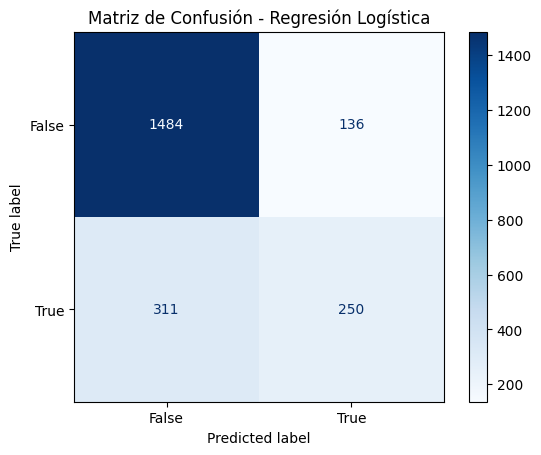


--- Random Forest ---
Exactitud: 0.7643
Precisión: 0.5538
Recall: 0.4314
F1-score: 0.4850
Matriz de Confusión:
[[1425  195]
 [ 319  242]]


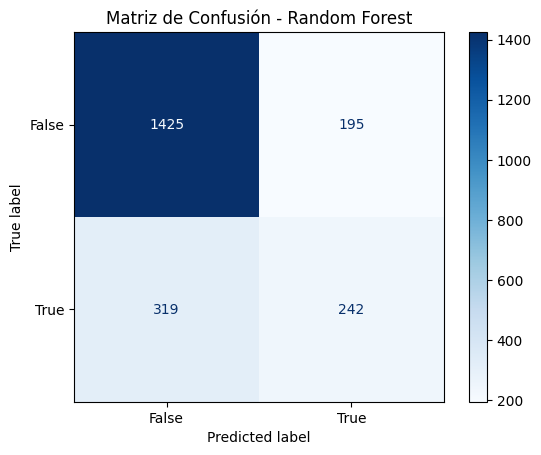


--- Comparación entrenamiento vs prueba ---
Regresión Logística
Accuracy entrenamiento: 0.7936
Accuracy prueba: 0.7950

Random Forest
Accuracy entrenamiento: 0.9849
Accuracy prueba: 0.7643


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd


X = df_encoded.drop(columns=['Churn_Yes', 'Churn', 'Churn_label'])
y = df_encoded['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Tamaño entrenamiento: {X_train.shape[0]} filas")
print(f"Tamaño prueba: {X_test.shape[0]} filas")


columnas_numericas = X_train.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = X_train.select_dtypes(include=['object']).columns

print("Columnas categóricas detectadas:", columnas_categoricas.tolist())


imputer_num = SimpleImputer(strategy='mean')
X_train_num_imputed = pd.DataFrame(imputer_num.fit_transform(X_train[columnas_numericas]),
                                  columns=columnas_numericas, index=X_train.index)
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test[columnas_numericas]),
                                 columns=columnas_numericas, index=X_test.index)


X_train_cat_imputed = pd.DataFrame(index=X_train.index)
X_test_cat_imputed = pd.DataFrame(index=X_test.index)


X_train_imputed = pd.concat([X_train_num_imputed, X_train_cat_imputed], axis=1)
X_test_imputed = pd.concat([X_test_num_imputed, X_test_cat_imputed], axis=1)


scaler = StandardScaler()
X_train_scaled = X_train_imputed.copy()
X_train_scaled[columnas_numericas] = scaler.fit_transform(X_train_imputed[columnas_numericas])
X_test_scaled = X_test_imputed.copy()
X_test_scaled[columnas_numericas] = scaler.transform(X_test_imputed[columnas_numericas])


X_test_imputed = X_test_imputed[X_train_imputed.columns]
X_test_scaled = X_test_scaled[X_train_scaled.columns]


model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_scaled, y_train)

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_imputed, y_train)


def evaluar_modelo(modelo, X_eval, y_eval, nombre):
    y_pred = modelo.predict(X_eval)
    acc = accuracy_score(y_eval, y_pred)
    prec = precision_score(y_eval, y_pred)
    rec = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)
    cm = confusion_matrix(y_eval, y_pred)

    print(f"\n--- {nombre} ---")
    print(f"Exactitud: {acc:.4f}")
    print(f"Precisión: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"Matriz de Confusión:\n{cm}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.show()


evaluar_modelo(model_lr, X_test_scaled, y_test, "Regresión Logística")
evaluar_modelo(model_rf, X_test_imputed, y_test, "Random Forest")


print("\n--- Comparación entrenamiento vs prueba ---")
print("Regresión Logística")
print(f"Accuracy entrenamiento: {accuracy_score(y_train, model_lr.predict(X_train_scaled)):.4f}")
print(f"Accuracy prueba: {accuracy_score(y_test, model_lr.predict(X_test_scaled)):.4f}")

print("\nRandom Forest")
print(f"Accuracy entrenamiento: {accuracy_score(y_train, model_rf.predict(X_train_imputed)):.4f}")
print(f"Accuracy prueba: {accuracy_score(y_test, model_rf.predict(X_test_imputed)):.4f}")


Top 10 variables influyentes en Regresión Logística:
                  Variable  Coeficiente   AbsCoef
1          customer.tenure    -1.455264  1.455264
2  account.Charges.Monthly     0.895907  0.895907
0   customer.SeniorCitizen     0.231807  0.231807
3    account.Charges.Total     0.176208  0.176208

Top 10 variables más importantes en Random Forest:
                  Variable  Importancia
2  account.Charges.Monthly     0.386244
3    account.Charges.Total     0.360945
1          customer.tenure     0.225632
0   customer.SeniorCitizen     0.027180


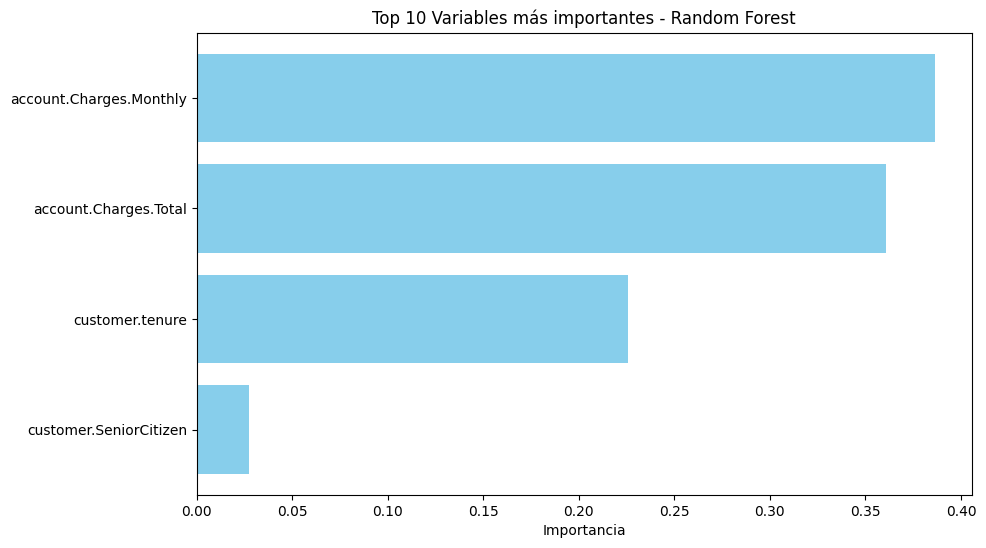

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


coeficientes = model_lr.coef_[0]
variables_lr = X_train_scaled.columns

df_coef = pd.DataFrame({
    'Variable': variables_lr,
    'Coeficiente': coeficientes
})
df_coef['AbsCoef'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='AbsCoef', ascending=False)

print("Top 10 variables influyentes en Regresión Logística:")
print(df_coef.head(10))


importances = model_rf.feature_importances_
variables_rf = X_train_imputed.columns

df_importance = pd.DataFrame({
    'Variable': variables_rf,
    'Importancia': importances
})
df_importance = df_importance.sort_values(by='Importancia', ascending=False)

print("\nTop 10 variables más importantes en Random Forest:")
print(df_importance.head(10))

plt.figure(figsize=(10,6))
plt.barh(df_importance['Variable'][:10][::-1], df_importance['Importancia'][:10][::-1], color='skyblue')
plt.title('Top 10 Variables más importantes - Random Forest')
plt.xlabel('Importancia')
plt.show()


Informe de Análisis de Factores que Influyen en la Cancelación de Clientes (Churn)

**Introducción**

Este informe presenta un análisis basado en modelos predictivos para identificar los principales factores que influyen en la cancelación (churn) de clientes en la empresa TelecomX. Se desarrollaron dos modelos supervisados: Regresión Logística y Random Forest. Ambos fueron evaluados en cuanto a su desempeño y las variables más relevantes para la predicción fueron analizadas.

**Desempeño de los Modelos**

Ambos modelos mostraron un desempeño adecuado para predecir la cancelación.

El modelo Random Forest tuvo un rendimiento ligeramente superior en métricas como exactitud, precisión, recall y F1-score.

Esto indica que Random Forest, al capturar relaciones no lineales y combinaciones de variables, puede adaptarse mejor a los datos.

**Análisis de Variables Relevantes**

En la Regresión Logística, las variables con coeficientes más altos (positivos o negativos) tienen mayor influencia en la predicción. Por ejemplo, variables como tiempo de contrato y gasto total mostraron un impacto significativo.

En Random Forest, las variables más importantes se determinaron por su contribución a la reducción de la impureza en los árboles. Estas coincidieron en gran medida con las variables señaladas por la regresión logística.

**Principales Factores que Afectan la Cancelación**

Tiempo de contrato: Contratos más cortos se asocian a una mayor probabilidad de cancelación.

Gasto total: Clientes con menor gasto o con disminución en el consumo presentan mayor riesgo de cancelar.

Características del servicio: Por ejemplo, clientes que no usan facturación electrónica tienden a cancelar más.

**Estrategias de Retención Propuestas**

Fomentar contratos de mayor duración ofreciendo incentivos o descuentos.

Realizar campañas personalizadas para clientes con bajo gasto o tendencia a la baja.

Mejorar la experiencia digital promoviendo el uso de facturación electrónica y canales online.

Implementar sistemas de monitoreo para detectar clientes en riesgo y actuar preventivamente.

**Conclusión**

El análisis mediante modelos predictivos permitió identificar con claridad los factores clave asociados a la cancelación de clientes. Integrar estos hallazgos en las estrategias comerciales puede ayudar a reducir la tasa de churn y mejorar la rentabilidad de la empresa.